In [21]:
import heapq
import math
import numpy as np
import matplotlib.pyplot as plt
from typing import List, Tuple, Optional

In [22]:
# 定义节点类，用于存储迷宫中每个点的信息
class Node:
    def __init__(self, x: int, y: int, g: float = 0, h: float = 0, parent=None):
        self.x = x  # x坐标
        self.y = y  # y坐标
        self.g = g  # g值：从起点到当前节点的代价
        self.h = h  # h值：启发式估算的当前节点到终点的代价
        self.parent = parent  # 父节点
        self.f = g + h  # f值：g值 + h值

    def __lt__(self, other):
        return self.f < other.f  # 对节点进行比较，依据f值

In [23]:
# 启发式函数：使用欧几里得距离
def heuristic(a: Node, b: Node) -> float:
    return math.sqrt((a.x - b.x) ** 2 + (a.y - b.y) ** 2)

In [24]:
# 获取节点的邻居（8个方向）
def get_neighbors(node: Node, maze: List[List[int]]) -> List[Node]:
    neighbors = []
    rows = len(maze)
    cols = len(maze[0])
    directions = [(-1, 0), (1, 0), (0, -1), (0, 1), (-1, -1), (-1, 1), (1, -1), (1, 1)]

    for dx, dy in directions:
        nx, ny = node.x + dx, node.y + dy
        if 0 <= nx < rows and 0 <= ny < cols and maze[nx][ny] == 0:
            neighbors.append(Node(nx, ny))

    return neighbors


In [25]:
# 从终点回溯到起点，重构路径
def reconstruct_path(current: Node) -> List[Tuple[int, int]]:
    path = []
    while current.parent is not None:
        path.append((current.x, current.y))
        current = current.parent
    path.append((current.x, current.y))
    # 返回正向的路径
    return path[::-1]

In [26]:
# A* 算法主体
def astar_search(maze: List[List[int]], start: Tuple[int, int], end: Tuple[int, int]) -> Optional[
    List[Tuple[int, int]]]:
    start_node = Node(start[0], start[1])
    end_node = Node(end[0], end[1])

    open_list = []
    heapq.heappush(open_list, start_node)  # 使用堆数据结构作为开启列表
    closed_list = set()  # 使用集合作为关闭列表

    while open_list:
        # 每次取出cost最小的Node
        current = heapq.heappop(open_list)

        if (current.x, current.y) == (end_node.x, end_node.y):
            return reconstruct_path(current)  # 找到路径，进行重构
        # 否则进行A*搜索
        closed_list.add((current.x, current.y))
        # 对每一个邻居计算cost
        for neighbor in get_neighbors(current, maze):
            if (neighbor.x, neighbor.y) in closed_list:
                continue

            neighbor.g = current.g + heuristic(neighbor, current)
            neighbor.h = heuristic(neighbor, end_node)
            neighbor.f = neighbor.g + neighbor.h
            neighbor.parent = current

            if neighbor not in open_list:
                heapq.heappush(open_list, neighbor)

    return None  # 未找到路径

In [47]:
# 画出迷宫及路径的函数
def draw_maze_and_path(maze, path, start, end):
    maze_np = np.array(maze)
    path_np = np.zeros_like(maze_np)

    for x, y in path:
        path_np[x, y] = 1

    vis_arr = maze_np + path_np * 2

    cmap = plt.cm.colors.ListedColormap(['black', 'red', 'white'])
    bounds = [-0.5, 0.5, 1.5, 2.5]
    norm = plt.cm.colors.BoundaryNorm(bounds, cmap.N)

    fig, ax = plt.subplots(figsize=(8, 8))
    ax.imshow(vis_arr, cmap=cmap, norm=norm, extent=[-0.5, 9.5, 9.5, -0.5])

    plt.text(start[1], start[0], 'S', fontsize=16, ha='center', va='center', color='green', fontweight='bold')
    plt.text(end[1], end[0], 'E', fontsize=16, ha='center', va='center', color='blue', fontweight='bold')

    plt.title('A* Pathfinding Algorithm', fontsize=20, fontweight='bold')
    plt.xlabel('X Coordinate', fontsize=14, fontweight='bold')
    plt.ylabel('Y Coordinate', fontsize=14, fontweight='bold')

    # cbar = plt.colorbar(ax.get_images()[0], ticks=[0, 1, 2], orientation='vertical', pad=0.01, aspect=30)
    # cbar.ax.set_yticklabels(['Path', 'Obstacle', 'Found Path'], fontsize=12, fontweight='bold')
    # cbar.outline.set_visible(False)

    ax.set_xticks([])
    ax.set_yticks([])

    plt.tight_layout()
    plt.show()

In [48]:
# 测试数据
maze = [
    [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 1, 0, 0, 1, 0, 0, 0],
    [0, 0, 0, 1, 0, 0, 1, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 1, 0, 1, 0],
    [1, 1, 1, 1, 1, 1, 1, 0, 1, 0],
    [0, 0, 0, 0, 0, 0, 1, 1, 1, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
]
start, end = (0, 0), (9, 9)

In [49]:
# 找到路径
path = astar_search(maze, start, end)

In [50]:
path

[(0, 0),
 (1, 0),
 (2, 1),
 (3, 1),
 (4, 2),
 (5, 3),
 (4, 4),
 (3, 5),
 (2, 6),
 (3, 7),
 (4, 8),
 (5, 8),
 (6, 9),
 (7, 9),
 (8, 9),
 (9, 9)]

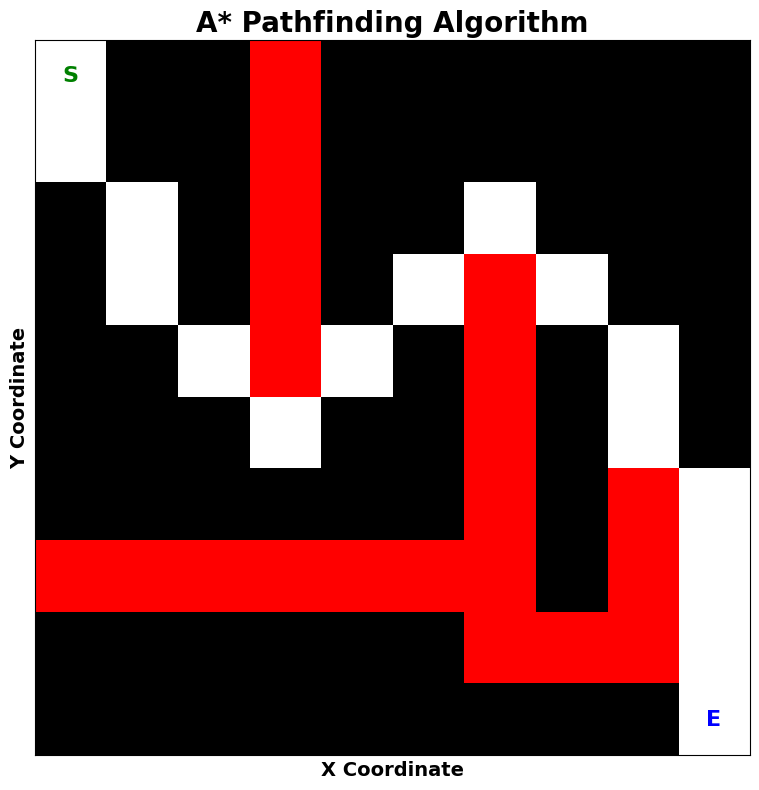

In [51]:
# 画出迷宫和路径
draw_maze_and_path(maze, path, start, end)